In [1]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



/kaggle/input/supermarket-sales-insights-and-optimization/Supermarket.py
/kaggle/input/supermarket-sales-insights-and-optimization/Total_Sales_By_Gender_and_Product_Line.JPG
/kaggle/input/supermarket-sales-insights-and-optimization/Total_Sales_PayMethods.JPG
/kaggle/input/supermarket-sales-insights-and-optimization/Total_Sales.JPG
/kaggle/input/supermarket-sales-insights-and-optimization/Total_Sales_Monthly.JPG
/kaggle/input/supermarket-sales-insights-and-optimization/X_Sales_Strategy_Insights.JPG
/kaggle/input/supermarket-sales-insights-and-optimization/Total_Avg_Sales.JPG
/kaggle/input/supermarket-sales-insights-and-optimization/Total_Sales_Overtime.JPG
/kaggle/input/supermarket-sales-insights-and-optimization/Variables_Pair_Plot.JPG
/kaggle/input/supermarket-sales-insights-and-optimization/supermarket_sales - Sheet1.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df= pd.read_csv('/kaggle/input/supermarket-sales-insights-and-optimization/supermarket_sales - Sheet1.csv')
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [4]:
#Size of data
df.shape

(1000, 17)

In [5]:
#Seeing missing data
df.isna().sum()
#No missing values

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

EDA

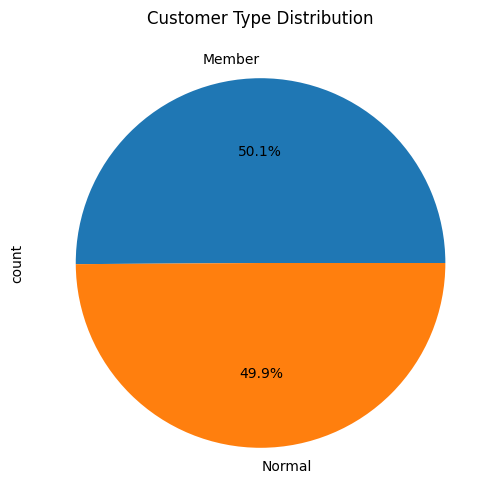

In [6]:
#Checking the customer Composition
plt.figure(figsize=(6, 6))
df['Customer type'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Customer Type Distribution')
plt.show()

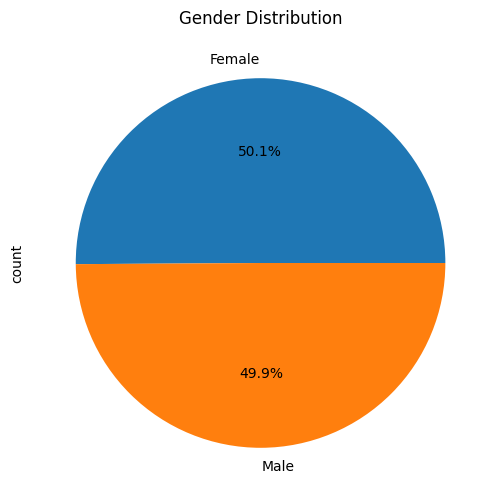

In [7]:
#Checking the gender Composition
plt.figure(figsize=(6, 6))
df['Gender'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Gender Distribution')
plt.show()

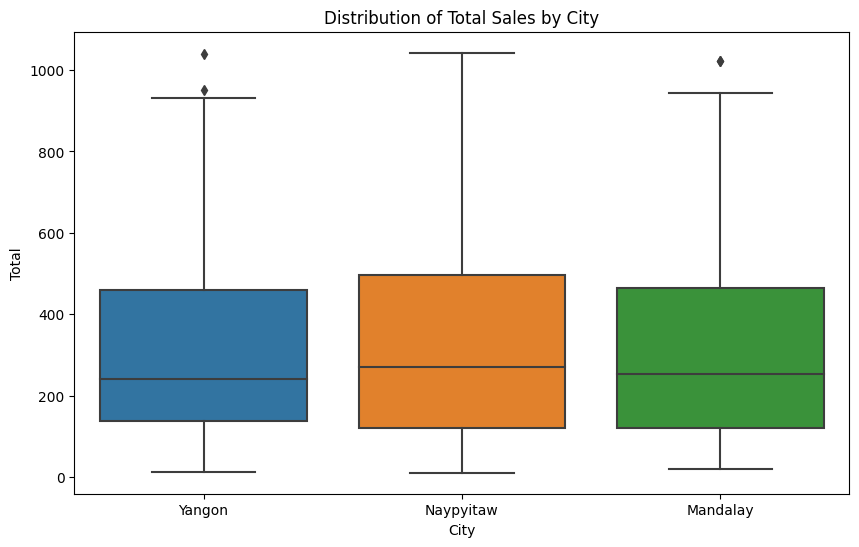

In [8]:
#Product Line
#Box-plot distribution 
plt.figure(figsize=(10, 6))
sns.boxplot(x='City', y='Total', data=df)
plt.title('Distribution of Total Sales by City')
plt.show()

Naypyitaw has a slightly higher sales comparatively

/tmp/ipykernel_18/1295000952.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Product line', y='Total', data=df, ci=None)


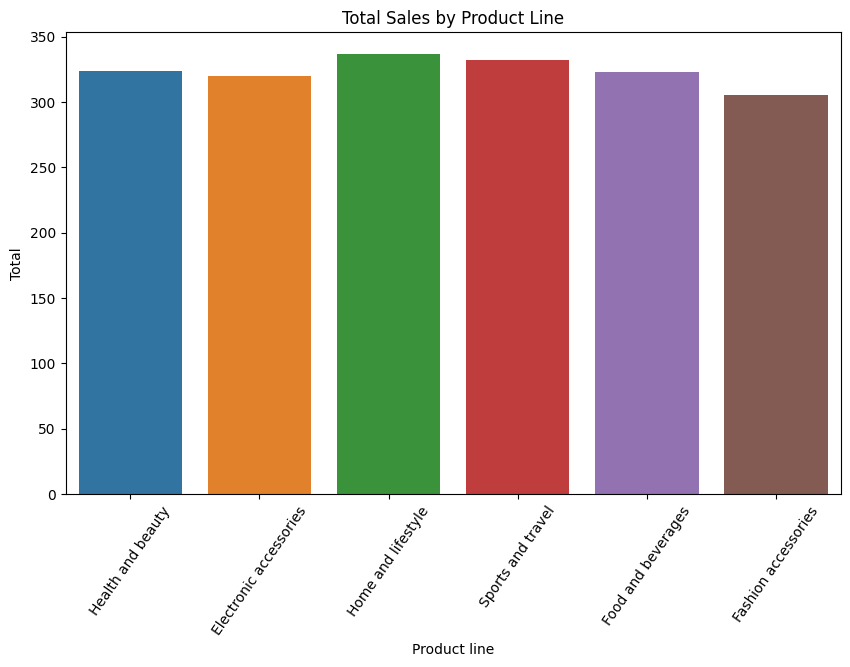

In [9]:
#Product line Vs Total Sales
plt.figure(figsize=(10, 6))
sns.barplot(x='Product line', y='Total', data=df, ci=None)
plt.title('Total Sales by Product Line')
plt.xticks(rotation=55)
plt.show()

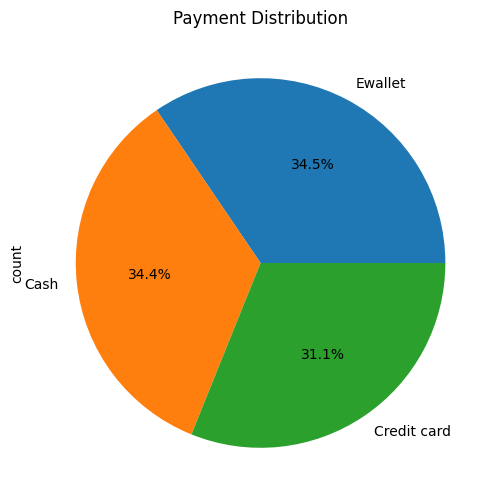

In [10]:
#Checking the Payment Mode Composition
plt.figure(figsize=(6, 6))
df['Payment'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Payment Distribution')
plt.show()

/tmp/ipykernel_18/361170257.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Product line', y='Rating', data=df, ci=None)


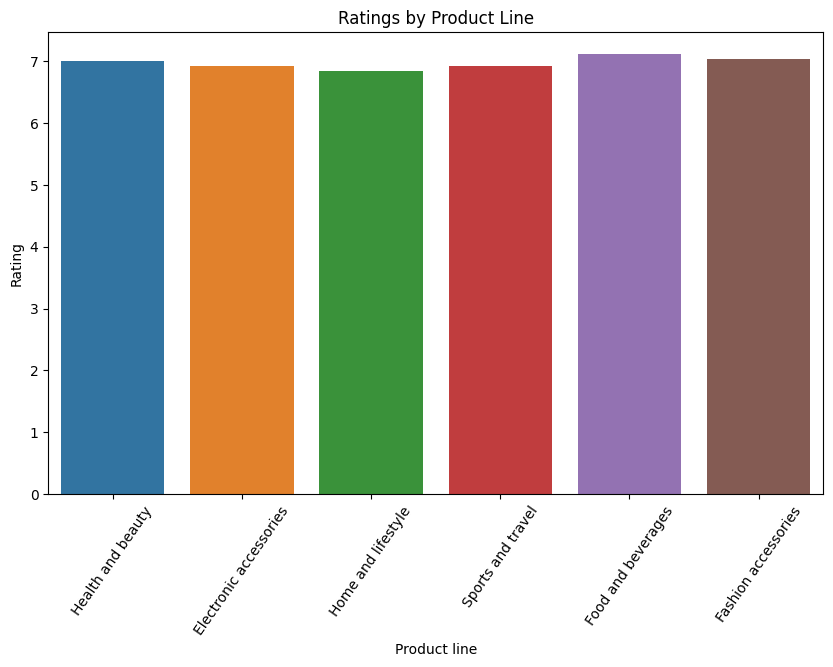

In [11]:
#Product Line and Rtaing
plt.figure(figsize=(10, 6))
sns.barplot(x='Product line', y='Rating', data=df, ci=None)
plt.title('Ratings by Product Line')
plt.xticks(rotation=55)
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


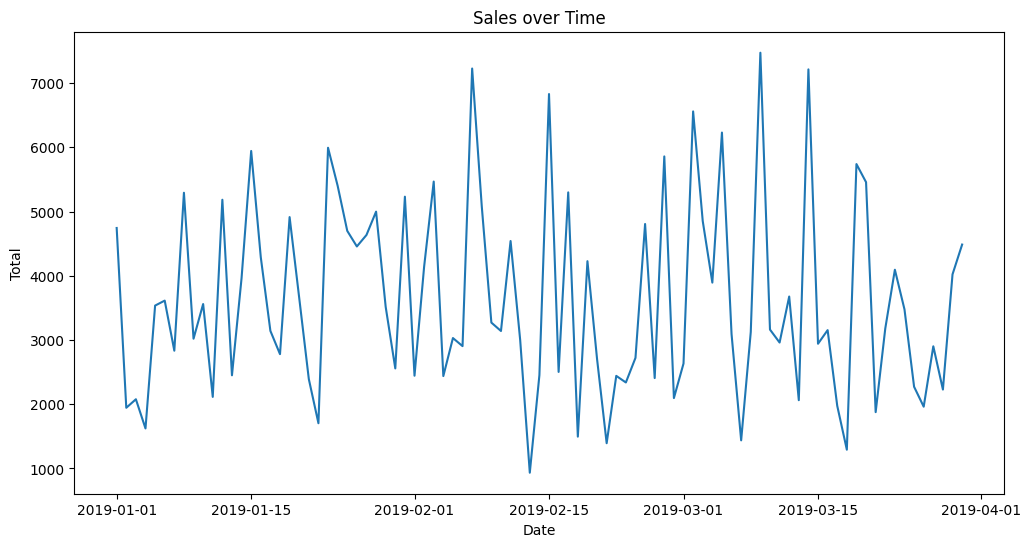

In [12]:
#Breakdown of sales overtime
import datetime as dt
df['Date']=pd.to_datetime(df['Date'])
df['day_month']=df['Date'].dt.strftime('%d-%m')
df['year']=df['Date'].dt.year
from matplotlib.ticker import StrMethodFormatter

sales = df.groupby('Date').sum()['Total'].reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Total', data=sales)
plt.title('Sales over Time')
plt.show()

#Seasonal breakdown - We use seasonal decompose , but that is not that useful as data is only for limited months

In [13]:
#Seasonal decompose- Time series decompose
from statsmodels.tsa.seasonal import seasonal_decompose
result= seasonal_decompose(df['Total'], model= 'additive', period=52)

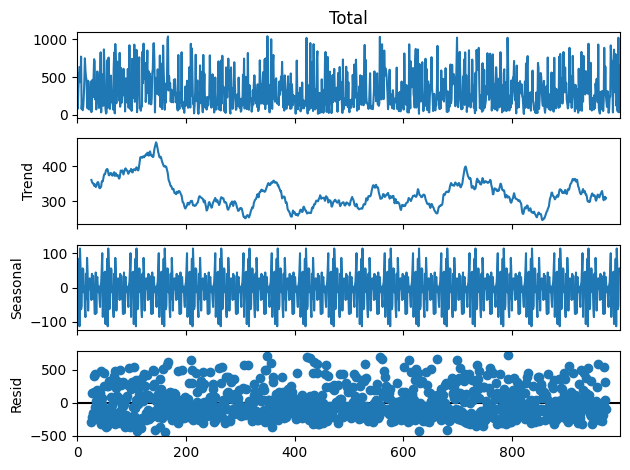

In [14]:
#Accessing the decomposed components
trend= result.trend
seasonal= result.seasonal
residual = result.resid

#plotting
result.plot()
plt.show()

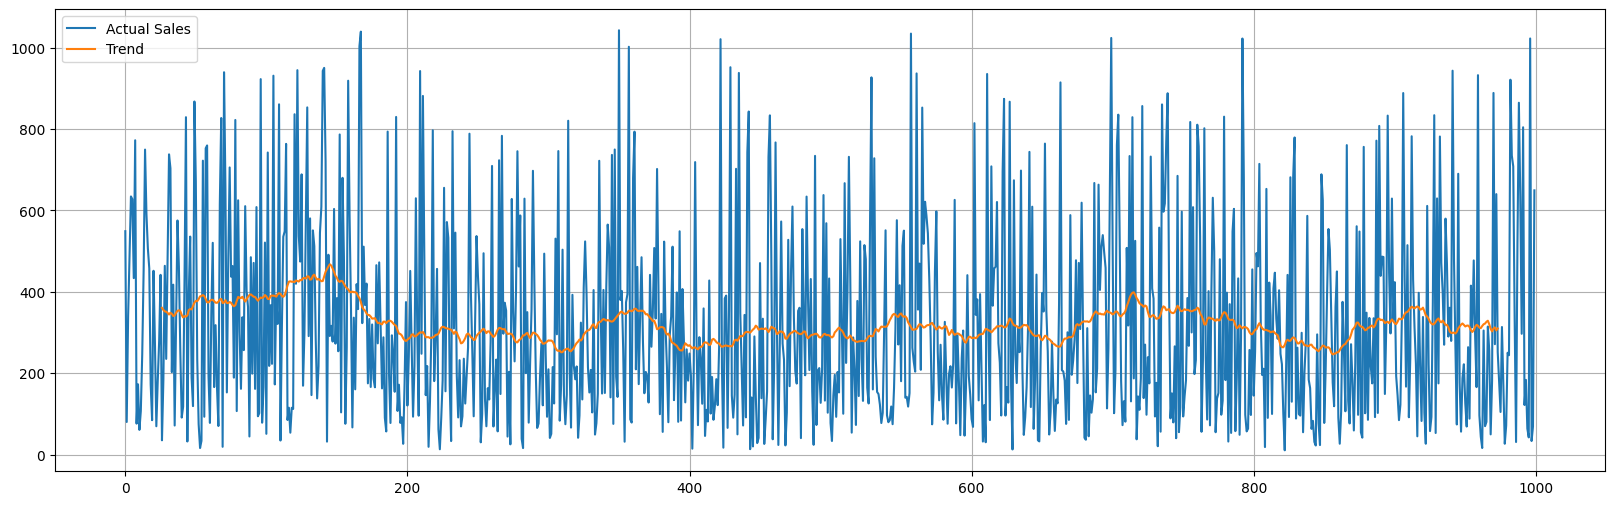

In [15]:
#Actual Vs Seasonal
plt.figure(figsize=(20,6))
plt.plot(df['Total'],label='Actual Sales')
plt.plot(trend,label='Trend')
plt.grid()
plt.legend()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.97688D+00    |proj g|=  6.81622D-02


 This problem is unconstrained.



At iterate    5    f=  6.92606D+00    |proj g|=  1.28123D-02

At iterate   10    f=  6.91915D+00    |proj g|=  4.31597D-03

At iterate   15    f=  6.89158D+00    |proj g|=  7.99460D-02

At iterate   20    f=  6.78812D+00    |proj g|=  7.10111D-04

At iterate   25    f=  6.78807D+00    |proj g|=  3.97438D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     27     34      1     0     0   6.917D-06   6.788D+00
  F =   6.7880718370708761     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


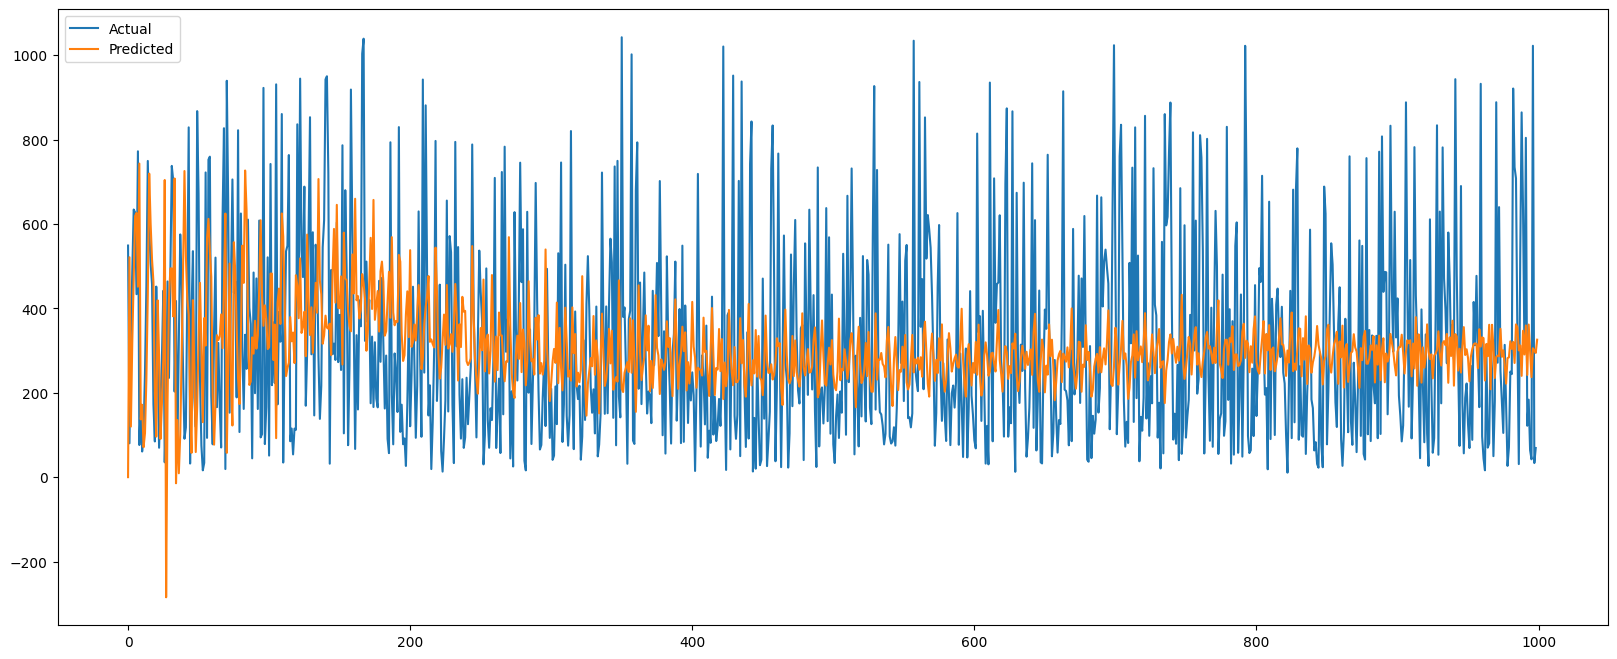

In [16]:
#Predicting using SARIMAX
from statsmodels.tsa.statespace.sarimax import SARIMAX
sarima_1= SARIMAX(df['Total'], order=(1,1,1), seasonal_order=(1,1,1,26))

pred_1=sarima_1.fit().predict()
pred_1.index=df.index
pred_1
#Comparison of actual vs predicted
plt.figure(figsize=(20,8))
plt.plot(df['Total'][:-1],label='Actual')
plt.plot(pred_1,label='Predicted')
plt.legend()

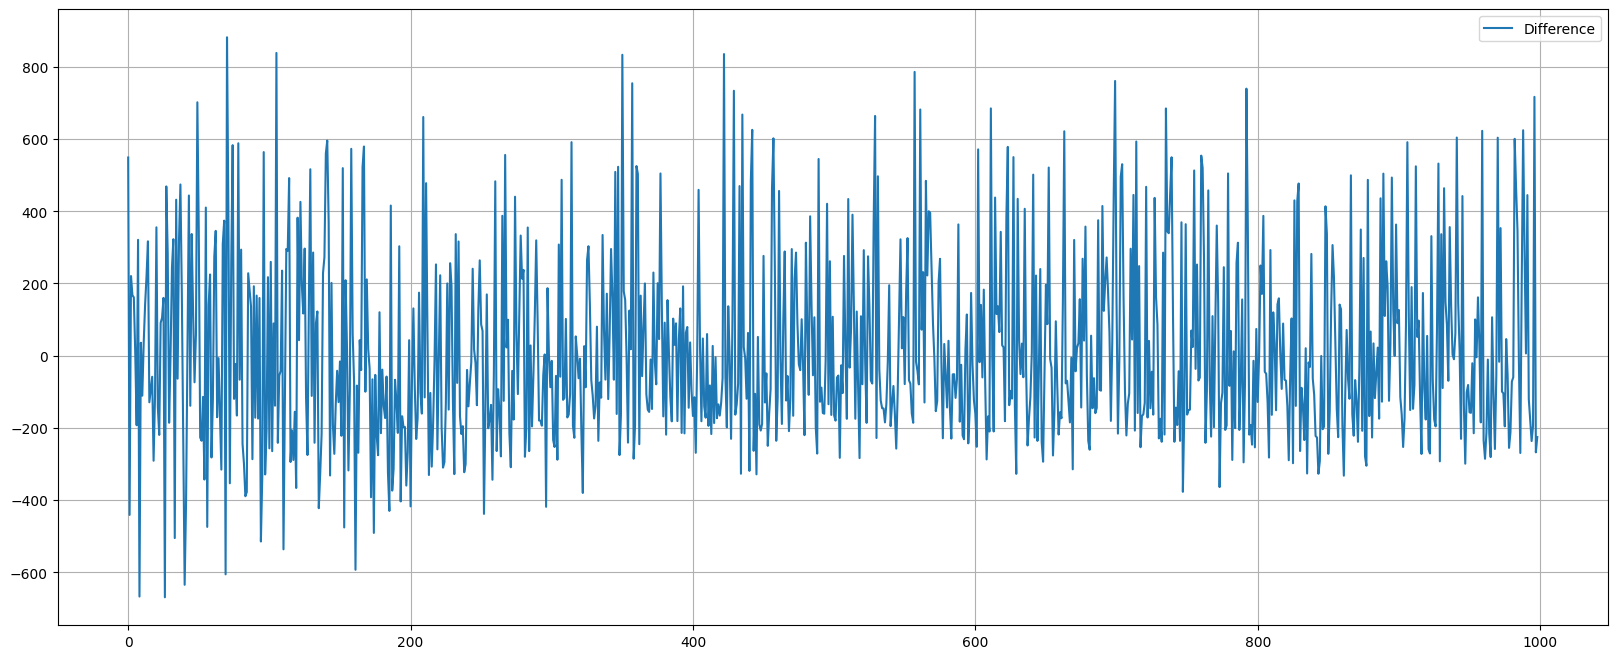

In [17]:
#Difference
plt.figure(figsize=(20,8))
plt.plot(df['Total'][:-1]-pred_1,label='Difference')
plt.grid()
plt.legend()

#Considerable difference as higher up

In [18]:
#One another method is by using prophet by meta
!pip install prophet

In [19]:
from prophet import Prophet

In [20]:
df_2=df.copy()
df_2['Date'] = pd.to_datetime(df_2['Date'])
df_2 = df_2[['Date', 'Total']].rename(columns={'Date': 'ds', 'Total': 'y'})
df_2 = df_2.groupby('ds').sum().reset_index()
# Initialize the Prophet model
model = Prophet()

# Fit the model
model.fit(df_2)

21:23:47 - cmdstanpy - INFO - Chain [1] start processing
21:23:47 - cmdstanpy - INFO - Chain [1] done processing


/opt/conda/lib/python3.10/site-packages/prophet/plot.py:71: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/opt/conda/lib/python3.10/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',
/opt/conda/lib/python3.10/site-packages/prophet/plot.py:226: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` o

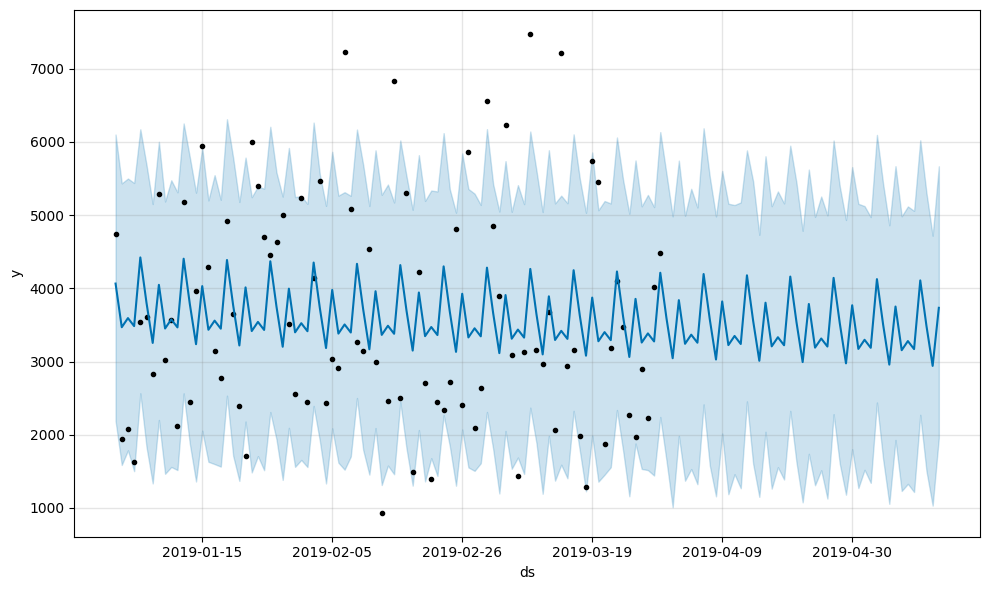

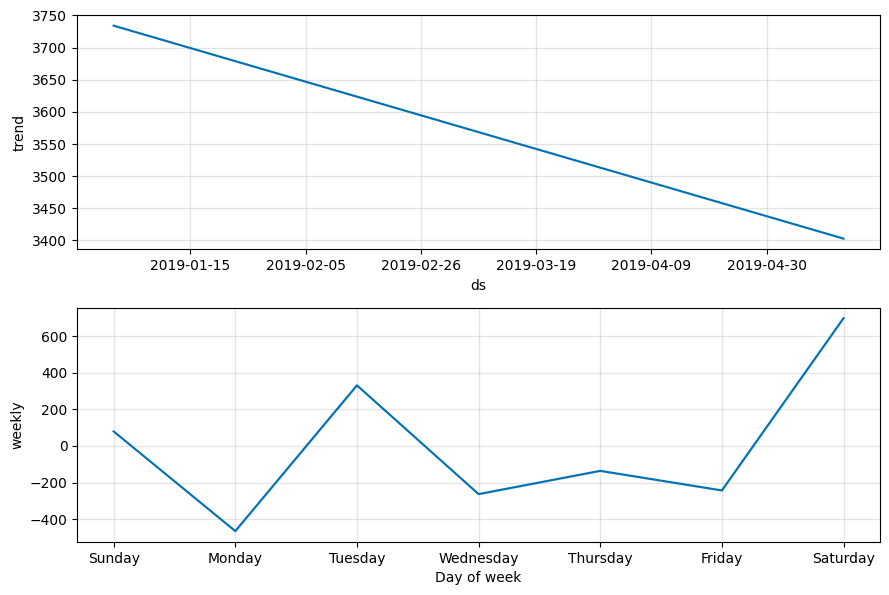

In [21]:
#Creating future data
pred_new = model.make_future_dataframe(periods=45, freq='D')  #Next 45 days forecast
forecast = model.predict(pred_new)
# Plot the forecast
fig = model.plot(forecast)
fig_1 = model.plot_components(forecast)
plt.show()

